# Face Off

**จากโจทย์ของ Face Off นิสิตจะได้เรียนรู้ ดังนี้**
* วิธีการอ่านรูปภาพด้วย **`OpenCV`** และแปลงประเภทของรูปภาพด้วย **`cv2.COLOR_BGR2RGB`**
* วิธีการค้นหาใบหน้า (Face Detection) ด้วยวิธี **`MTCNN`**
* วิธีการเปลี่ยนขนาดของรูปภาพด้วย **`cv.resize`**
* วิธีการคัดลอกข้อมูล Array ด้วย **`np.copy`**
* วิธีการแทนค่าข้อมูลใน Array
* วิธีการสร้างและเรียกใช้ **`Function`** | **`def`**

![alt text](https://raw.githubusercontent.com/mrolarik/1-2562-digital-image-processing/master/dip-face-off.jpg)

## การข้อมูลจาก google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## เรียกดูข้อมูลจาก google drive

In [2]:
!ls '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'

brad-pitt.jpg	image-room.jpg	   Messi-01.jpg  Messi-04.jpg
dog-01.jpg	keanu-reeves.jpg   Messi-02.jpg  waldo.PNG
find_waldo.jpg	license-plate.jpg  Messi-03.jpg


## อ่านข้อมูลรูปภาพ

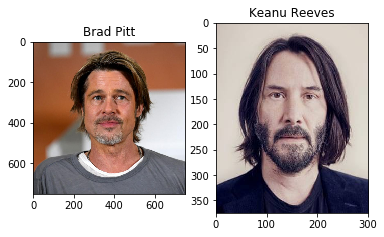

In [3]:
import cv2
import matplotlib.pyplot as plt

img_loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_brad = cv2.imread(img_loc + 'brad-pitt.jpg')
img_brad = cv2.cvtColor(img_brad, cv2.COLOR_BGR2RGB)

img_keanu = cv2.imread(img_loc + 'keanu-reeves.jpg')
img_keanu = cv2.cvtColor(img_keanu, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title('Brad Pitt')
plt.imshow(img_brad)

plt.subplot(1,2,2)
plt.title('Keanu Reeves')
plt.imshow(img_keanu)
plt.show()


## MTCNN Face Detection - ค้นหาใบหน้าด้วยวิธี MTCNN

### ติดตั้ง MTCNN

In [4]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257690 sha256=8863a0c26bafa01beaa11abddccb07cc6ec99bda116d1fd13906950673d70e04
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


### ฟังก์ชันการค้นหาใบหน้าด้วย MTCNN

In [0]:
from mtcnn.mtcnn import MTCNN

def mtcnn_face_detection(img):
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(img)
  
  # extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height
  
  # extract the face
  face = img[y1:y2, x1:x2]
  
  return face, y1, y2, x1, x2
  

### แสดงรูปภาพใบหน้า

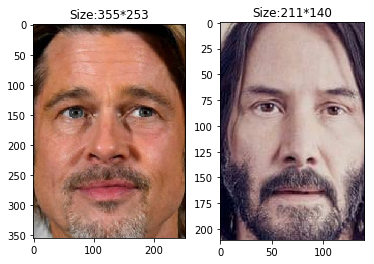

In [7]:
face_brad, b_y1, b_y2, b_x1, b_x2 = mtcnn_face_detection(img_brad)
face_keanu, k_y1, k_y2, k_x1, k_x2 = mtcnn_face_detection(img_keanu)

plt.subplot(1,2,1)
tmp_title = 'Size:' + str(face_brad.shape[0]) + '*' + str(face_brad.shape[1])
plt.title(tmp_title)
plt.imshow(face_brad)

plt.subplot(1,2,2)
tmp_title = 'Size:' + str(face_keanu.shape[0]) + '*' + str(face_keanu.shape[1])
plt.title(tmp_title)
plt.imshow(face_keanu)
plt.show()

## เปลี่ยนขนาดรูปภาพ (Resize) และแสดงขนาดของรูปภาพ (Shape)

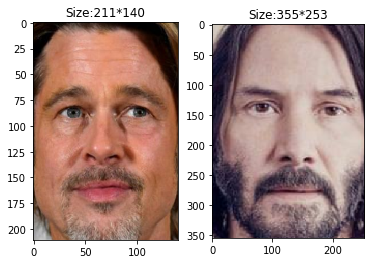

In [8]:
new_face_brad = cv2.resize(face_brad, (face_keanu.shape[1], face_keanu.shape[0]))
new_face_keanu = cv2.resize(face_keanu, (face_brad.shape[1], face_brad.shape[0]))


plt.subplot(1,2,1)
tmp_title = 'Size:' + str(new_face_brad.shape[0]) + '*' + str(new_face_brad.shape[1])
plt.title(tmp_title)
plt.imshow(new_face_brad)

plt.subplot(1,2,2)
tmp_title = 'Size:' + str(new_face_keanu.shape[0]) + '*' + str(new_face_keanu.shape[1])
plt.title(tmp_title)
plt.imshow(new_face_keanu)
plt.show()

## คัดลอกข้อมูล Array

In [0]:
import numpy as np

new_img_brad = np.copy(img_brad)
new_img_keanu = np.copy(img_keanu)

## แทนค่าใน Array ด้วยรูปใบหน้าใหม่

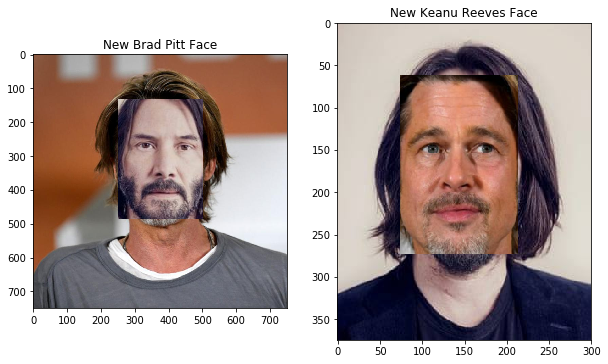

In [11]:
new_img_brad[b_y1:b_y2, b_x1:b_x2] = new_face_keanu
new_img_keanu[k_y1:k_y2, k_x1:k_x2] = new_face_brad

plt.figure(figsize= (10,10))
plt.subplot(1,2,1)
plt.title('New Brad Pitt Face')
plt.imshow(new_img_brad)

plt.subplot(1,2,2)
plt.title('New Keanu Reeves Face')
plt.imshow(new_img_keanu)
plt.show()